In [78]:
import numpy as np
import statsmodels
import pandas as pd 
import seaborn as sb
path='Covid Data.csv'

df=pd.read_csv(path)
df.head(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [79]:
df.describe().apply(lambda s: s.apply('{:f}'.format))

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000
mean,1.632194,8.980565,1.499259,1.190765,79.522875,3.346831,41.794102,49.765585,2.186404,2.260569,2.242626,2.298132,2.128989,2.435143,2.261810,2.125176,2.257180,2.214333,5.305653,79.553974
std,0.482208,3.723278,0.500000,0.392904,36.868886,11.912881,16.907389,47.510733,5.424242,5.132258,5.114089,5.462843,5.236397,6.646676,5.194850,5.175445,5.135354,5.323097,1.881165,36.823073
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,1.000000,97.000000,2.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,97.000000
50%,2.000000,12.000000,1.000000,1.000000,97.000000,2.000000,40.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,97.000000
75%,2.000000,12.000000,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,97.000000
max,2.000000,13.000000,2.000000,2.000000,99.000000,99.000000,121.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,7.000000,99.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [81]:
df.isnull().sum().sum()

np.int64(0)

In [82]:

for i in df.columns:
    print(i,len(df[i].unique()))

USMER 2
MEDICAL_UNIT 13
SEX 2
PATIENT_TYPE 2
DATE_DIED 401
INTUBED 4
PNEUMONIA 3
AGE 121
PREGNANT 4
DIABETES 3
COPD 3
ASTHMA 3
INMSUPR 3
HIPERTENSION 3
OTHER_DISEASE 3
CARDIOVASCULAR 3
OBESITY 3
RENAL_CHRONIC 3
TOBACCO 3
CLASIFFICATION_FINAL 7
ICU 4


In [83]:
df.DATE_DIED.value_counts()


DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
25/12/2020         1
01/01/2021         1
02/01/2021         1
07/01/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64

In [84]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

In [85]:
df['DEATH']=[2 if i=='9999-99-99' else 1 for i in df['DATE_DIED']]

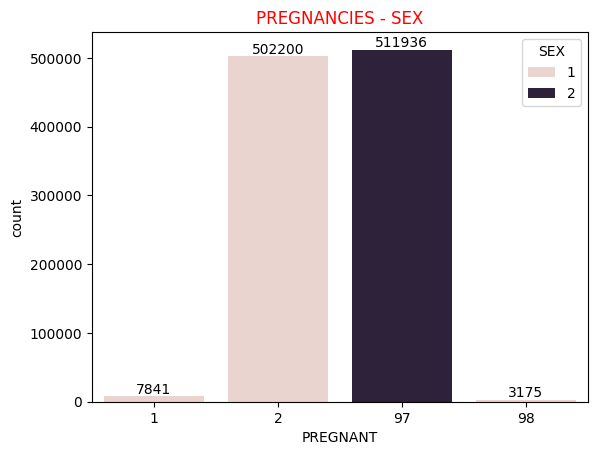

In [86]:

import matplotlib.pyplot as plt
plt.figure()
ax = sb.countplot(data=df,x='PREGNANT', hue=df['SEX'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX",color="red")
plt.show()

In [87]:
df.PREGNANT.replace({97:2,98:2},inplace=True)
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]


C:\Users\Hi\AppData\Local\Temp\ipykernel_16428\754116488.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.PREGNANT.replace({97:2,98:2},inplace=True)


C:\Users\Hi\AppData\Local\Temp\ipykernel_16428\2605054194.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df,x='INTUBED',palette='pastel',ax=axes[0])
C:\Users\Hi\AppData\Local\Temp\ipykernel_16428\2605054194.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df,x='ICU',ax=axes[1],palette='pastel')


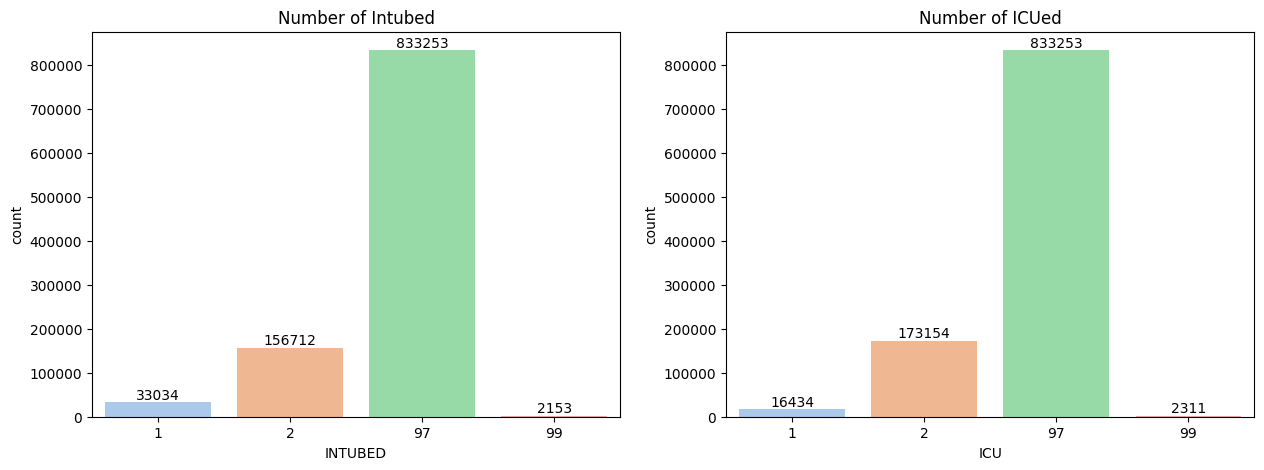

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sb.countplot(data=df,x='INTUBED',palette='pastel',ax=axes[0])
axes[0].set_title('Number of Intubed')
for i in axes[0].containers:
    axes[0].bar_label(i)
sb.countplot(data=df,x='ICU',ax=axes[1],palette='pastel')
axes[1].set_title('Number of ICUed')
for i in axes[1].containers:
    axes[1].bar_label(i)
plt.show()

In [89]:
df.drop(columns=['INTUBED','ICU','DATE_DIED'],inplace=True)

C:\Users\Hi\AppData\Local\Temp\ipykernel_16428\50683289.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sb.countplot(data=df,x='DEATH',palette='pastel')


[<BarContainer object of 1 artists>, <BarContainer object of 1 artists>]


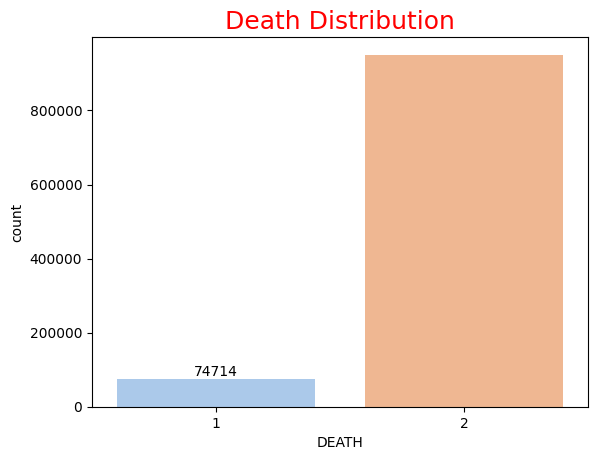

In [90]:
ax=sb.countplot(data=df,x='DEATH',palette='pastel')
print(ax.containers)
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18,color="red")
plt.show()

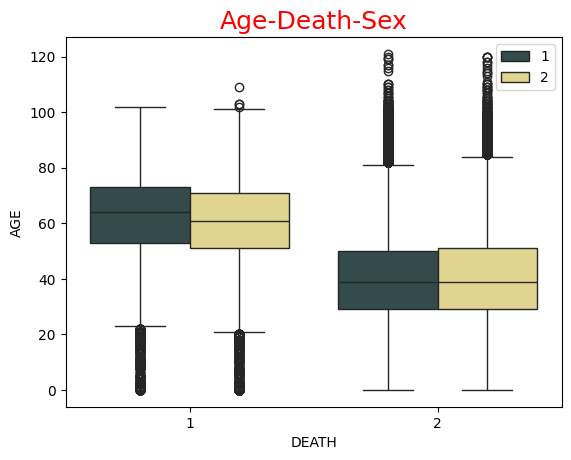

In [91]:
sb.boxplot(x="DEATH", y="AGE",hue="SEX",data=df,palette=sb.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-Death-Sex",fontsize=18, color="red")
plt.legend(loc="best")

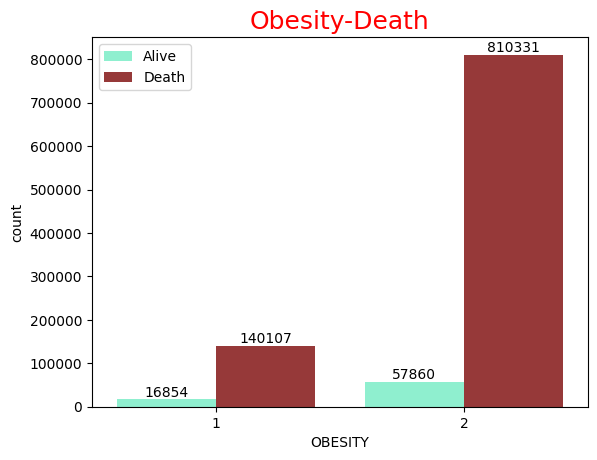

In [92]:
ax=sb.countplot(data=df,x='OBESITY',hue='DEATH', palette=sb.color_palette(["#7fffd4","#a52a2a"]))
plt.title("Obesity-Death",fontsize=18, color="red")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.legend(loc="best",labels=['Alive','Death'])

Text(0.5, 1.0, 'Correlation Between Features')

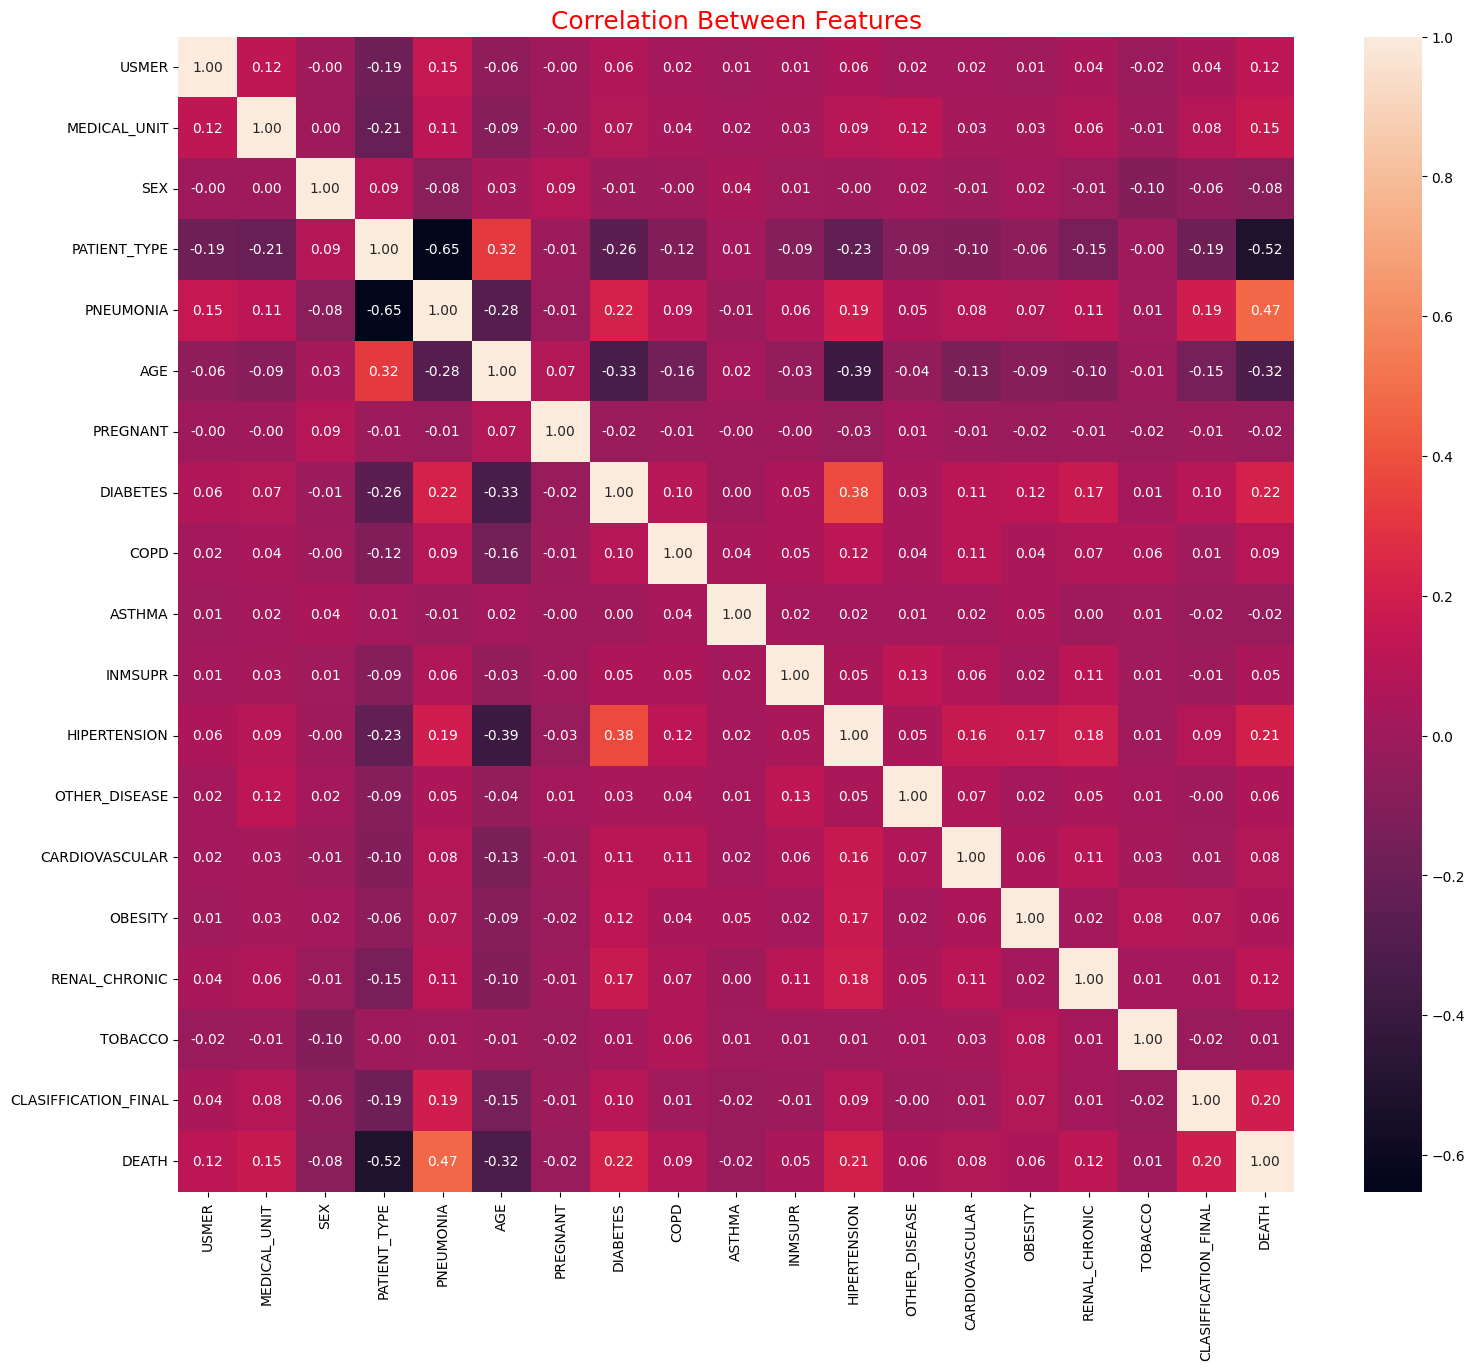

In [93]:
plt.figure(figsize=(18,15))
sb.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red")

In [94]:
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

df.drop(columns=unrelevant_columns,inplace=True,errors='ignore')
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,65,2,1,2,3,1
1,2,1,1,1,72,2,1,1,5,1
2,2,1,2,2,55,1,2,2,3,1
3,2,1,1,2,53,2,2,2,7,1
4,2,1,1,2,68,1,1,2,3,1


In [95]:
df=pd.get_dummies(df,columns=['MEDICAL_UNIT','CLASIFFICATION_FINAL'],drop_first=True,dtype=int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1025152 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                  Non-Null Count    Dtype
---  ------                  --------------    -----
 0   USMER                   1025152 non-null  int64
 1   PATIENT_TYPE            1025152 non-null  int64
 2   PNEUMONIA               1025152 non-null  int64
 3   AGE                     1025152 non-null  int64
 4   DIABETES                1025152 non-null  int64
 5   HIPERTENSION            1025152 non-null  int64
 6   RENAL_CHRONIC           1025152 non-null  int64
 7   DEATH                   1025152 non-null  int64
 8   MEDICAL_UNIT_2          1025152 non-null  int64
 9   MEDICAL_UNIT_3          1025152 non-null  int64
 10  MEDICAL_UNIT_4          1025152 non-null  int64
 11  MEDICAL_UNIT_5          1025152 non-null  int64
 12  MEDICAL_UNIT_6          1025152 non-null  int64
 13  MEDICAL_UNIT_7          1025152 non-null  int64
 14  MEDICAL_UNIT_8          1025152 non-nul

In [96]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))

In [97]:
x = df.drop(columns="DEATH")
y = df["DEATH"]

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import sklearn.model_selection as sk
x=df.drop(columns='DEATH')
y=df.DEATH
rus = RandomUnderSampler(random_state=0)
x_resampled,y_resampled = rus.fit_resample(x,y)
print(x_resampled.shape)
print(y_resampled.shape)
x_train, x_test, y_train,y_test=sk.train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

(149428, 25)
(149428,)


,USMER,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,MEDICAL_UNIT_2,MEDICAL_UNIT_3,MEDICAL_UNIT_4,...,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
520425,2,1,2,-0.086957,2,2,2,0,0,0,...,0,0,1,0,0,1,0,0,0,0
924183,1,1,2,-0.565217,2,2,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
358273,1,2,1,1.173913,2,1,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1000450,2,1,2,0.086957,2,2,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
468027,1,2,1,1.826087,2,2,2,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [152]:
from sklearn.linear_model import Perceptron
model=Perceptron()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.6991567958241317

In [140]:
import numpy as np
import pandas as pd

class SinglePerceptron:
    def __init__(self, learning_rate=0.01, n_iters=300):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation_function(linear_output)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._activation_function(linear_output)
        return y_predicted

    def _activation_function(self, x):
        return np.where(x >= 0, 1, 0)
    def score(self, y_pred,y_test):
        y_test = np.array(y_test)
        y_pred = np.array(y_pred)

        # Calculate True Positives, False Positives, True Negatives, False Negatives
        TP = np.sum((y_test == 1) & (y_pred == 1)) 
        TN = np.sum((y_test == 0) & (y_pred == 0))
        # Calculate metrics
        accuracy = (TP + TN) / len(y_test)
        return accuracy



In [141]:
perceptron = SinglePerceptron()
perceptron.fit(x_train.values, y_train.values)
print('Accuracy: ',perceptron.score(perceptron.predict(x_test),y_test))

Accuracy:  0.49936425081978186


[1 2]
[1]


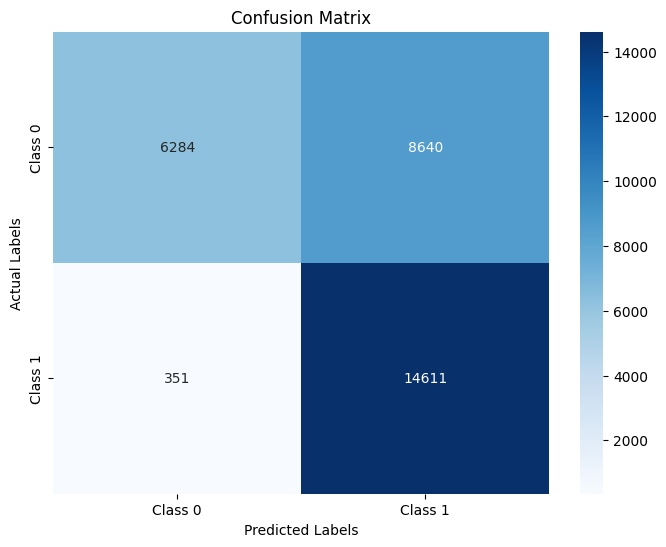

In [153]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model.predict(x_test))

# Define labels
labels = ['Class 0', 'Class 1']

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print(np.unique(y_test))
print(np.unique(perceptron.predict(x_test)))
# Plot heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()